In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data=pd.read_csv(mouse_drug_data_to_load)
clinical_data=pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
combined_data=pd.merge(clinical_data, mouse_data, how='left', on=["Mouse ID","Mouse ID"])
other_combined=pd.merge(mouse_data,clinical_data,on="Mouse ID")

# Display the data table for preview
combined_data.head(15)
# combined_data.dtypes


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril
5,h246,0,45.0,0,Ketapril
6,p189,0,45.0,0,Ketapril
7,n923,0,45.0,0,Ketapril
8,q119,0,45.0,0,Ketapril
9,f993,0,45.0,0,Naftisol


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

tumor_response=combined_data.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)'].reset_index()
tumor_response.head()


treatment_summary=pd.DataFrame(tumor_response)

treatment_summary

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_se=combined_data.groupby(['Drug','Timepoint']).sem()['Tumor Volume (mm3)'].reset_index()
tumor_se.head()


se_summary=pd.DataFrame(tumor_se)

se_summary.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames

tumor_pivot=treatment_summary.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

tumor_pivot

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


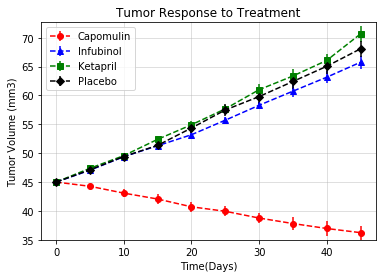

In [5]:
# Generate the Plot (with Error Bars)

cap_error=se_summary.loc[se_summary['Drug']=="Capomulin","Tumor Volume (mm3)"]
inf_error=se_summary.loc[se_summary['Drug']=="Infubinol","Tumor Volume (mm3)"]
ket_error=se_summary.loc[se_summary['Drug']=="Ketapril","Tumor Volume (mm3)"]
plc_error=se_summary.loc[se_summary['Drug']=="Placebo","Tumor Volume (mm3)"]

x_axis=np.arange(0,50,5)
x_axis

cap_tv=tumor_pivot.loc[:,'Capomulin']
inf_tv=tumor_pivot.loc[:,'Infubinol']
ket_tv=tumor_pivot.loc[:,'Ketapril']
plc_tv=tumor_pivot.loc[:,'Placebo']
                  
                         
# capomulin=plt.plot(x_axis, cap_tv, marker="o", color="red",linewidth=1)
# infubolin=plt.plot(x_axis, inf_tv, marker="^", color="blue",linewidth=1)
# ketapril=plt.plot(x_axis, ket_tv, marker="s", color="green",linewidth=1)
# placebo=plt.plot(x_axis, plc_tv, marker="D", color="black",linewidth=1)

plt.errorbar(x_axis,cap_tv, cap_error, label="Capomulin", fmt="o", color="red", linestyle="--")
plt.errorbar(x_axis,inf_tv, inf_error, label="Infubinol", fmt="^",color="blue", linestyle="--")
plt.errorbar(x_axis,ket_tv, ket_error, label="Ketapril", fmt="s",color="green", linestyle="--")
plt.errorbar(x_axis,plc_tv, plc_error, label="Placebo", fmt="D",color="black", linestyle="--")

plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend()
# plt.xlim(-0.35,50)
plt.ylim(35,max(ket_tv)+2)
plt.grid(alpha=0.50)

# Save the Figure
plt.savefig("Images/Tumor_Response.png")


In [6]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_response=combined_data.groupby(['Drug','Timepoint']).mean()['Metastatic Sites']
metastatic_response.head()


meta_treatment_summary=pd.DataFrame(metastatic_response)

meta_treatment_summary.head()



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_se=combined_data.groupby(['Drug','Timepoint']).sem()['Metastatic Sites']
metastatic_se.head()


meta_se_summary=pd.DataFrame(metastatic_se)

meta_se_summary.head()




Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames

meta_data=combined_data.groupby(['Drug','Timepoint']).mean()['Metastatic Sites'].reset_index()
meta_summary=pd.DataFrame(meta_data)
metastatic_pivot=meta_data.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')

metastatic_pivot



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


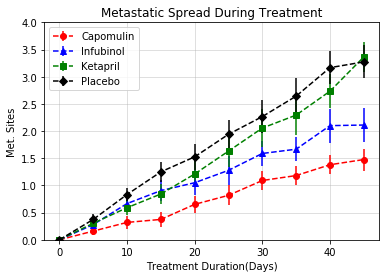

In [10]:
# Generate the Plot (with Error Bars)
meta_se_data=combined_data.groupby(['Drug','Timepoint']).sem()['Metastatic Sites'].reset_index()
meta_se_summary=pd.DataFrame(meta_se_data)


cap_meta_error=meta_se_summary.loc[meta_se_summary['Drug']=="Capomulin","Metastatic Sites"]
inf_meta_error=meta_se_summary.loc[meta_se_summary['Drug']=="Infubinol","Metastatic Sites"]
ket_meta_error=meta_se_summary.loc[meta_se_summary['Drug']=="Ketapril","Metastatic Sites"]
plc_meta_error=meta_se_summary.loc[meta_se_summary['Drug']=="Placebo","Metastatic Sites"]

cap_meta=metastatic_pivot.loc[:,'Capomulin']
inf_meta=metastatic_pivot.loc[:,'Infubinol']
ket_meta=metastatic_pivot.loc[:,'Ketapril']
plc_meta=metastatic_pivot.loc[:,'Placebo']
                  

plt.errorbar(x_axis,cap_meta, cap_meta_error, label="Capomulin", fmt="o", color="red", linestyle="--")
plt.errorbar(x_axis,inf_meta, inf_meta_error, label="Infubinol", fmt="^",color="blue", linestyle="--")
plt.errorbar(x_axis,ket_meta, ket_meta_error, label="Ketapril", fmt="s",color="green", linestyle="--")
plt.errorbar(x_axis,plc_meta, plc_meta_error, label="Placebo", marker="D",color="black", linestyle="--")

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration(Days)")
plt.ylabel("Met. Sites")
plt.legend()
plt.ylim(0.0,4.0)
plt.grid(alpha=0.50)

# Save the Figure

plt.savefig("Images/Metsite_Response.png")

# Show the Figure
plt.show()


## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mice_count=combined_data.groupby(['Drug','Timepoint']).count()['Mouse ID'].reset_index()
mice_count.head()


mice_summary=pd.DataFrame(mice_count)

mice_summary.rename(columns={"Drug":"Drug","Timepoint":"Timepoint","Mouse ID":"Mouse Count"}, inplace=True)

mice_summary.head()



,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames

mouse_pivot=mice_summary.pivot(index='Timepoint',columns='Drug',values='Mouse Count')

mouse_pivot



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


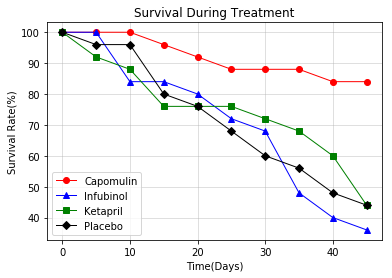

In [13]:
# Generate the Plot (Accounting for percentages)
plt.plot(x_axis,(mouse_pivot['Capomulin']/25*100), marker="o", color="red", linewidth=1, label="Capomulin")
plt.plot(x_axis,(mouse_pivot['Infubinol']/25*100), marker="^", color="blue", linewidth=1, label="Infubinol")
plt.plot(x_axis,(mouse_pivot['Ketapril']/25*100), marker="s", color="green", linewidth=1, label="Ketapril")
plt.plot(x_axis,(mouse_pivot['Placebo']/25*100), marker="D", color="black", linewidth=1, label="Placebo")

plt.title("Survival During Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate(%)")
plt.legend()
plt.grid(alpha=0.50)

# Save the Figure

plt.savefig("Images/Survival_Rates.png")


# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [15]:
tumorvalue_beginning=tumor_pivot.loc[0,:]
percent_change=((tumor_pivot.loc[45,:]-tumorvalue_beginning)/tumorvalue_beginning)*100
percent_change
pct_chng=pd.DataFrame(percent_change).reset_index()
pct_chng.rename(columns={"Drug":"Drug",0:"Pct_Change"}, inplace=True)
pct_chng


,Drug,Pct_Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


In [16]:
# Store all Relevant Percent Changes into a Tuple
pct_change=pct_chng[['Drug','Pct_Change']]
tuple_pct_chng=[tuple(x) for x in pct_change.values]
tuple_pct_chng



[('Capomulin', -19.475302667894173),
 ('Ceftamin', 42.516491855897414),
 ('Infubinol', 46.12347172785184),
 ('Ketapril', 57.028794686606076),
 ('Naftisol', 53.92334713476923),
 ('Placebo', 51.29796048315153),
 ('Propriva', 47.24117486320634),
 ('Ramicane', -22.320900462766673),
 ('Stelasyn', 52.08513428789896),
 ('Zoniferol', 46.57975086509525)]

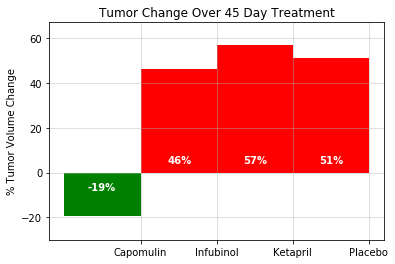

In [72]:
# Splice the data between passing and failing drugs [AT THIS POINT I RECEIVED HELP FROM MY FRIEND NICK GEORGE WHO IS A PYTHON EXPERT
# JUST WANTED TO DOCUMENT THAT I RECEIVED HELP ON EVERYTHING BELOW]
# ALL ABOVE IS MY WORK FROM MY KNOWLEDGE, THE CLASS ACTIVITIES, OR GOOGLE


drug_names = ["Capomulin","Infubinol","Ketapril","Placebo"]
avg_tumor_vol = []

for x in drug_names:
    for i in tuple_pct_chng:
        if x in i:
            avg_tumor_vol.append(i[1])
            if i[1] > 0:
                bar = plt.bar(x, i[1], width = -1, align="edge", color="red")
            else:
                bar = plt.bar(x, i[1], width = -1, align="edge", color="green")

# Use functions to label the percentages of changes
def percent_label(drug_x):
    
    for t in tuple_pct_chng:
        if drug_x == t[0]:
            drug_percent = int(t[1])
            
    drug_label = (str(drug_percent) + "%")

    idx_pos = drug_names.index(drug_x)

    if idx_pos == 0:
        horiz = -.7
    elif idx_pos > 0:
        horiz = -.65
        horiz = horiz + idx_pos

    if drug_percent < 0:
        vert = -8
    elif drug_percent > 0:
        vert = 4

    plt.text(horiz, vert, drug_label, color="white", fontweight="bold")

# Call functions to implement the function calls
percent_label("Capomulin")
percent_label("Infubinol")
percent_label("Ketapril")
percent_label("Placebo")


plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.grid(alpha=0.50, axis='both')
plt.ylim(-30,max(avg_tumor_vol)+10)
plt.yticks(np.arange(-20, 80, 20))

# Save the Figure

plt.savefig("Images/Tumor_Volume_Change.png")


# Show the Figure
fig.show()